# Information Measures

## Introduction

所謂分類的乾不乾淨，專業術語為資訊純不純、亂不亂，數學上可以用吉尼不純度（ Gini impurity）、熵（Entropy）以及分類錯誤（ Classification Error）三種方式來計算。三種方式都是在衡量混亂的程度，越高代表越不純。在機器學習最重要的Scikit-learn套件中，預設是採取吉尼不純度來衡量。



## Impurity 不純度

在數據分析和機器學習中，**impurity（不純度）**是衡量數據集混亂程度的一種指標。在決策樹模型中，不純度用於評估數據集的分裂質量，尋找最能分離數據的特徵。

不純度反映了數據集中不同類別的混合程度。在決策樹中，我們希望每次分裂後的子集盡可能「純」，也就是說每個子集中的數據最好只屬於單一類別。不純度越低，表示數據集越純。



###  Gini Impurity (吉尼不純度)

Gini 不純度是另一種亂度的衡量方式，也叫 Gini index。表示在樣本集合中一個隨機選中的樣本被分錯的機率是多少。它的數字越大代表序列中的資料越混亂，數值皆為 0~1 之間，其中 0 代表該特徵在序列中是完美的分類。

也就是說，當選中的樣本被分錯的機率越低，則 Gini 指數越小，代表越純；反之，則 Gini 指數越高，代表越不純。當所有樣本為一個類、或是可以完美分類時，則 Gini 指數為 0

。公式如下所示，其中 p 代表是的機率、q 為代表否的機率。我們可以從圖中範例很清楚地知道當所有的資料都被分類一致的時候混亂程度即為 0，當資料各有一半不同時混亂程度即為 0.5。



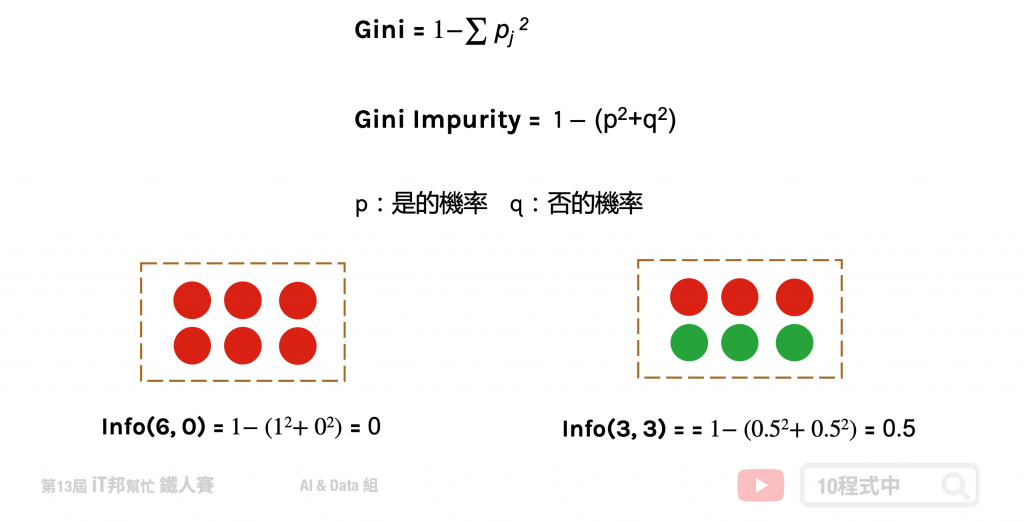

要注意的是Gini Index與Information Gain兩者有一個最大的差別：INFORMATION GAIN一次可產生多個不同節點，而Gini Index一次僅能產生兩個，即True或False的Binary的二元分類樹。



基尼不純度通常用於決策樹中的CART（Classification and Regression Tree）算法。


### Entropy

資訊熵（Information Entropy）表示的是所有樣本中各種類別出現的不確定性之和，熵越大代表不確定性就越大，簡單來說，越是不容易發生的事件帶給我們的資訊量越大。



熵反映了數據集中類別分佈的混亂程度。當所有樣本都屬於同一類別時，熵為零，表示數據集完全純淨（即不混亂）。當樣本均勻分佈在所有可能的類別中時，熵達到最大值，表示數據集最不純（即最混亂）。



事件的資訊量∝事件的不確定程度



資訊量大代表什麼意思？也就是說越不確定的事情，裡面隱藏的訊息就會越多，舉例來說好了，今天拿出電腦按下開關時，會有這三種可能性發生，第一個是我的電腦可以正常開機的機率為 0.7，電腦無法開機的機率為 0.2，電腦開機就爆炸的機率為 0.1 ，如下表格所示

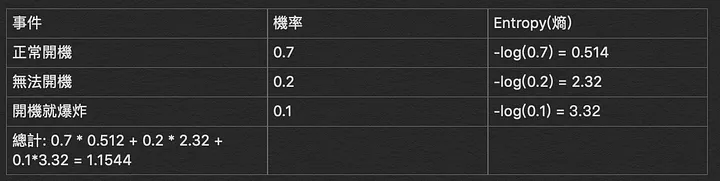

我們可以看到充滿越多不確定性的事件，也就是越多資訊量的事件，會擁有越高的 Entropy，這樣就是 Entropy 在資訊科技當中的精神

#### Cross-Entropy(交叉熵)

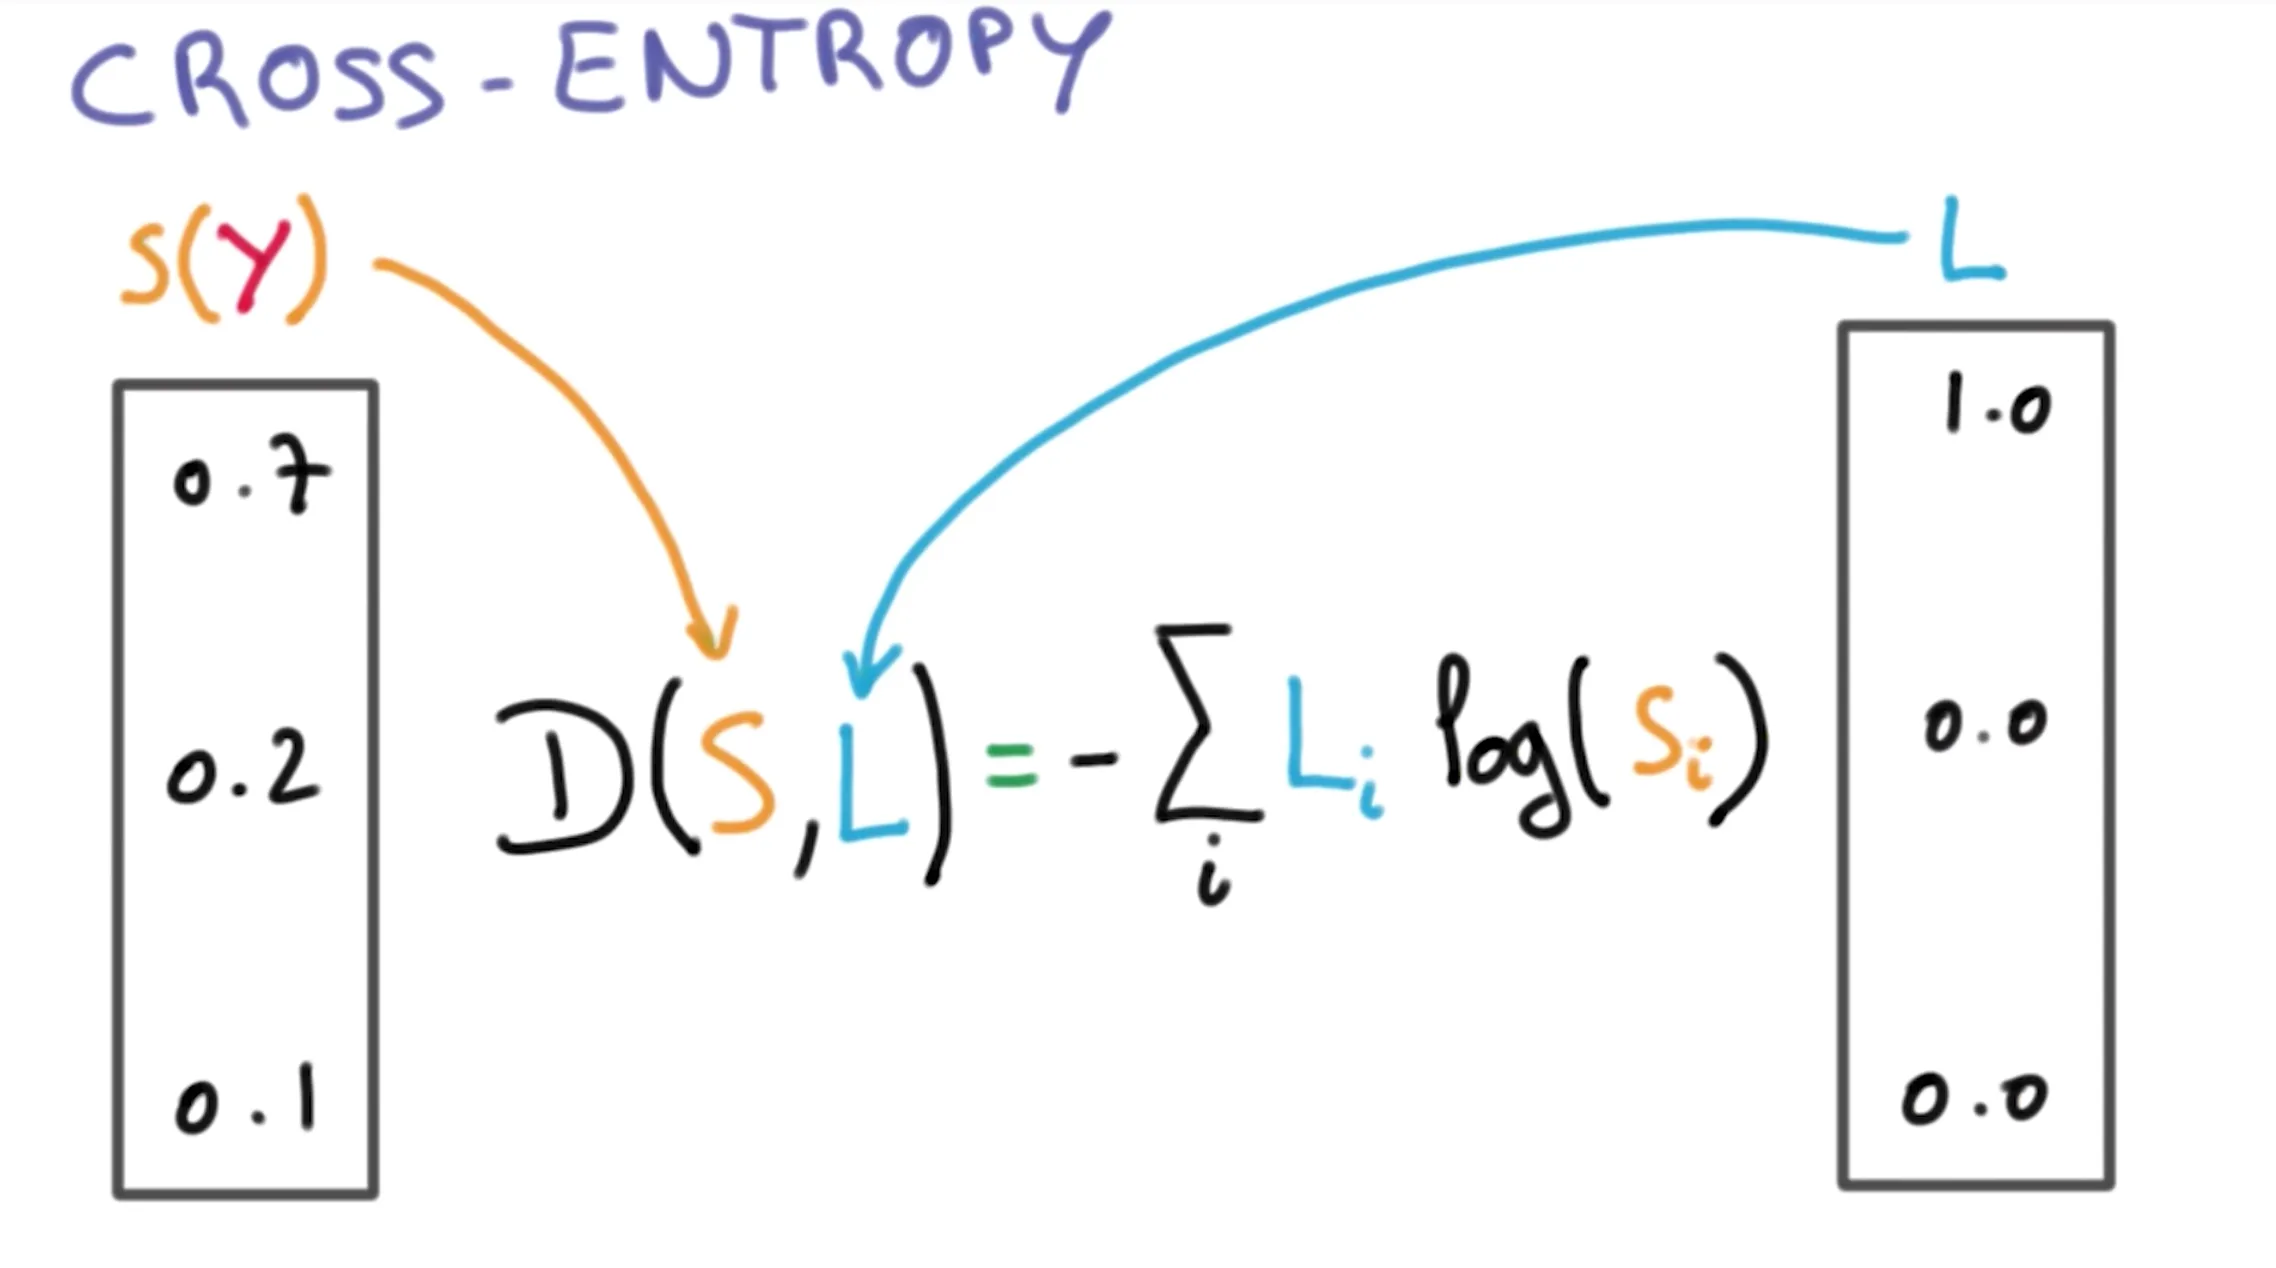

cross-entropy 用意是在觀測預測的機率分佈與實際機率分布的誤差範圍，就拿下圖為例就直覺說明，cross entropy (purple line=area under the blue curve)，我們預測的機率分佈為橘色區塊，真實的機率分佈為紅色區塊，藍色的地方就是 cross-entropy 區塊，紫色現為計算出來的值。

依照剛剛的說明，我們預測值與實際值差越多，也就是代表內涵的資訊量愈大，也就是不確定越多，也就是 Cross-entropy 會越高。



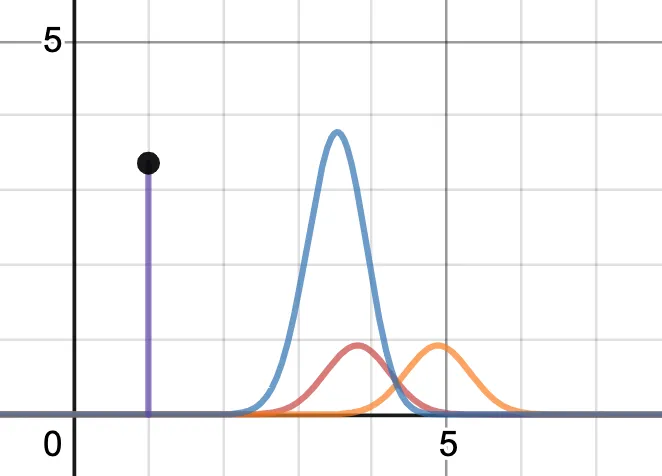

反之，如果疊合的區塊越多，就代表不確定性越少，也就是 cross-entropy 會越小，如下圖所示。



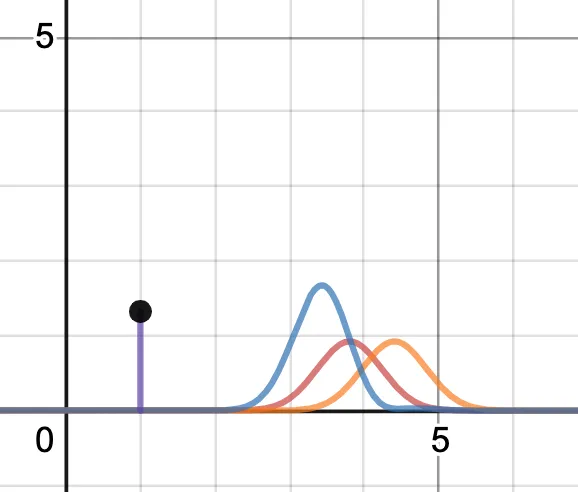

Entropy 通常用於分類模型，但也可以用於回歸中。概念一樣，公式不同。

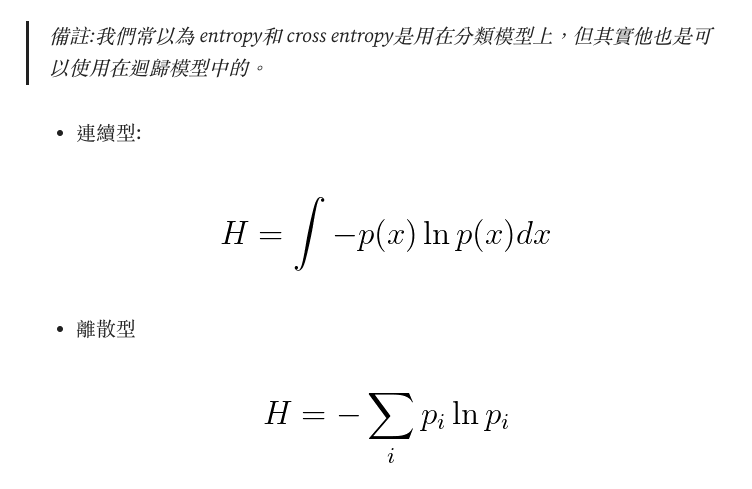

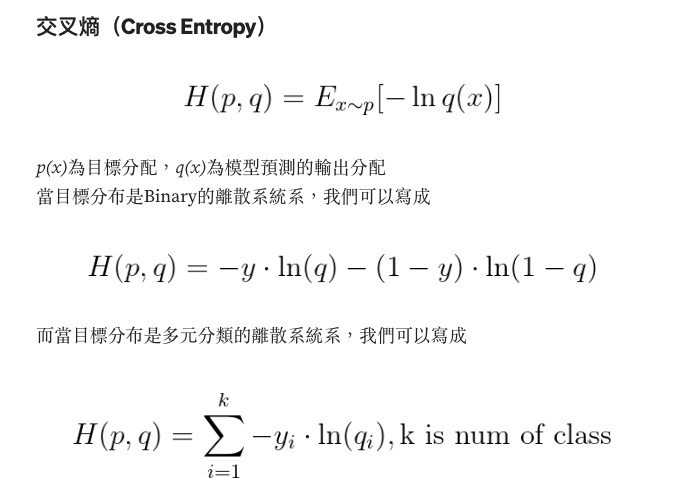

#### Relative Entropy(aka KL Divergence (Kullback-Leibler Divergence))

KL Divergence又稱作相對熵（Relative Entropy），它衡量的是相同事件空間裡的兩個概率分佈的差異情況。其物理意義是：在相同事件空間裡，模型輸出分配q(x)與目標分配p(x)間的差異程度。這裏請注意，是相對的概念。

KL Divergence其實就是Cross Entropy扣掉目標分布的Entropy，更深層的說，KL Divergence表示的是目前的編碼方法最多還可以下降多少nats期望值。


**定義**：KL散度衡量的是一個機率分布 \( Q \) 相對於另一個機率分布 \( P \) 的相對熵。KL散度的定義如下：

$$
D_{KL}(P || Q) = \sum_{x} P(x) \log \left( \frac{P(x)}{Q(x)} \right)
$$

或者對於連續分布，

$$
D_{KL}(P || Q) = \int P(x) \log \left( \frac{P(x)}{Q(x)} \right) \, dx
$$

**意義**：KL散度表示的是從分布 \( Q \) 到分布 \( P \) 的額外信息量。它是非對稱的，且 \( D_{KL}(P || Q) \neq D_{KL}(Q || P) \)。

**應用**：KL散度常用於信息理論、機器學習中的生成模型（如變分自編碼器，VAE）和優化問題。




交叉熵和KL散度之間有緊密的關係。交叉熵可以分解為熵（Entropy）和KL散度的和：

$$
H(P, Q) = H(P) + D_{KL}(P || Q)
$$

其中，\( H(P) \) 是分布 \( P \) 的熵，定義為：

$$
H(P) = - \sum_{x} P(x) \log P(x)
$$

這表明交叉熵包含了真實分布 \( P \) 的自身熵和 \( Q \) 相對於 \( P \) 的KL散度。因此，在最小化交叉熵時，我們實際上是在最小化KL散度，從而使預測分布 \( Q \) 盡可能接近真實分布 \( P \)。





- **交叉熵** 測量的是使用預測分布 \( Q \) 編碼真實分布 \( P \) 所需的平均位元數，包含了 \( P \) 的自身熵和 \( Q \) 相對於 \( P \) 的KL散度。
- **KL散度** 測量的是從預測分布 \( Q \) 到真實分布 \( P \) 的相對熵，即 \( Q \) 相對於 \( P \) 的信息損失。


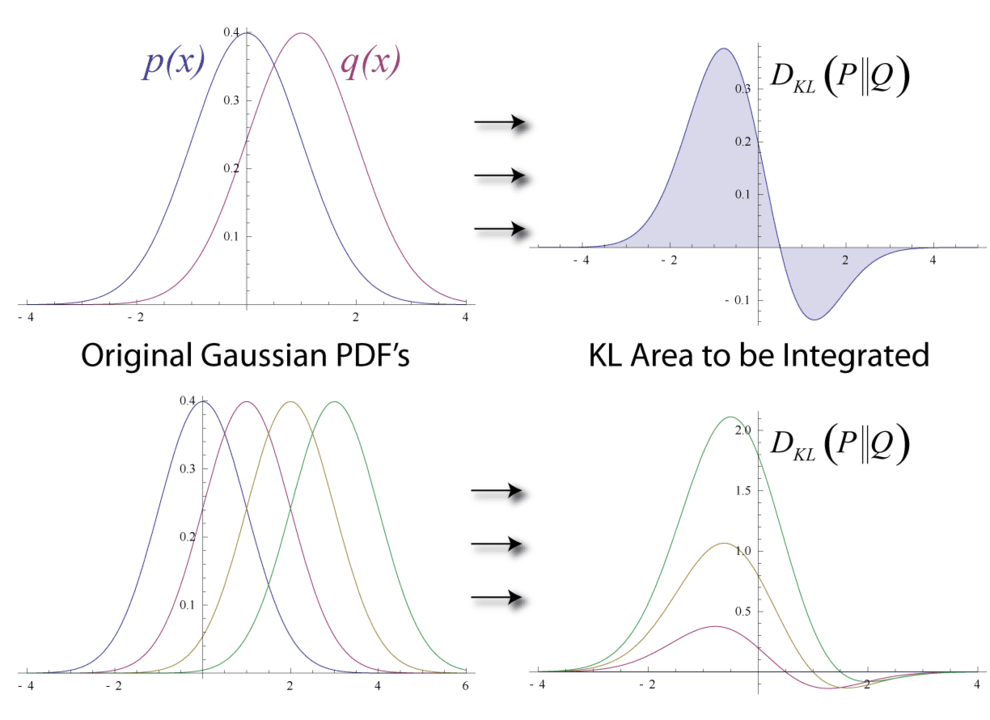

參考：

1. [關於深度學習中的Loss Function(Entropy、Cross Entropy、KL Divergence and f-Divergence)
](https://roger010620.medium.com/%E9%97%9C%E6%96%BC%E6%B7%B1%E5%BA%A6%E5%AD%B8%E7%BF%92%E4%B8%AD%E7%9A%84loss-function-entropy-cross-entropy-kl-divergence-and-f-divergence-3e997f293b2)

2. [何謂 Cross-Entropy (交叉熵)
](https://r23456999.medium.com/%E4%BD%95%E8%AC%82-cross-entropy-%E4%BA%A4%E5%8F%89%E7%86%B5-b6d4cef9189d)

3. [剖析深度學習 (2)：你知道Cross Entropy和KL Divergence代表什麼意義嗎？談機器學習裡的資訊理論
](https://ycc.idv.tw/deep-dl_2.html)

#### f-Divergence


在相同事件空間裡的兩個獨立的機率分配p(x)、q(x)
f這個函數用來衡量兩個機率密度p(x)、q(x)的區別，也就是衡量這兩個分配多麼的相同或者不同。

## 信息增益（Information Gain）

當用屬性對一個集合進行分割時，信息增益是熵的減少量，通過尋找能產生最高信息增益的最佳候選屬性來進行評估。其中，\( X \) 是一個隨機變量，\( H(X|A) \) 是給定屬性 \( A \) 的值時，隨機變量 \( X \) 的熵。

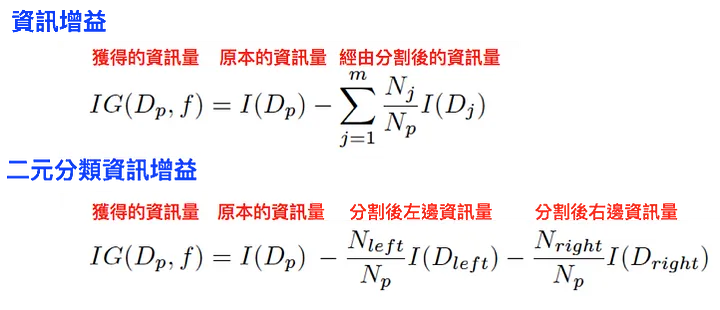

上面的式子，f代表節點用來作分割的feature，Dp、Dj分別代表父節點及第j個子節點的資料，Np、Nj分別代表父節點及第j個子節點的資料數量。這裡有一個比較重要的參數，I代表不純度(impurity measure)，可以把它想成是分類完整的程度，從式子可以看得出來，如果子節點的I總和越小，代表分割越乾淨，所以信息增益(IG)也就越大。



決策樹上的應用：

信息增益（Information Gain）指的是在數據集上應用某個特徵進行分裂後，熵的減少量。由於我們希望獲得的資訊量要最大，因此經由分割後的資訊量要越小越好。因此如果決策樹採用Information Gain的方式，要先算出每個節點分類的entropy，在選擇節點較小的entropy，因為越小的entropy代表Information Gain越高，因此就要選這個節點進行分類，才會將資料集分類到越來越pure的狀態。




演算法包含：ID3、C4.5

## 卡方統計量（Chi-squared statistic）



卡方統計量主要用於分類問題中的特徵選擇，特別是在離散型特徵的情況下。它評估每個特徵與目標變量之間的獨立性。以下是它在決策樹中的應用：

- **特徵選擇**: 在構建決策樹時，可以使用卡方檢驗來衡量每個特徵與目標變量之間的關聯性。這有助於選擇那些與目標變量有較強關聯的特徵，從而提高模型的預測能力。

- **計算方法**: 卡方統計量的計算基於實際值與預期值之間的差異，公式如下：
  \[
  \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
  \]
  其中 \( O_i \) 是觀察到的頻數，\( E_i \) 是期望的頻數。

- **應用場景**: 特別適合用於分類任務中類別型特徵的選擇。


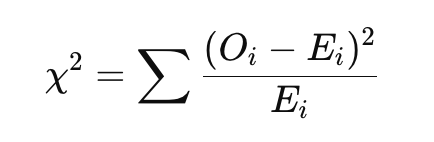


## 方差（Variance）



方差在回歸問題的決策樹（回歸樹）中非常重要，用於評估數據集的變異性。以下是它在決策樹中的應用：

- **分裂點選擇**: 在回歸樹中，方差用於衡量每個可能的分裂點如何影響數據的變異性。目標是找到那些能最大程度降低方差的分裂點，從而提高預測的準確性。

- **計算方法**: 方差衡量數據點與其均值之間的偏差，公式如下：
  \[
  \text{Variance} = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
  \]
  其中 \( x_i \) 是數據點，\( \bar{x} \) 是數據集的均值。

- **應用場景**: 適合用於回歸任務中，特別是需要對數值型目標變量進行精確預測時。



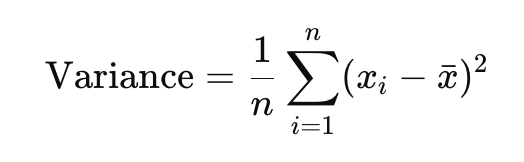

總結

- **卡方統計量**: 主要用於分類問題中的特徵選擇，幫助識別與目標變量最相關的特徵。
- **方差**: 主要用於回歸問題中的分裂點選擇，幫助減少預測結果的誤差。

在決策樹中，選擇合適的評估指標可以根據問題的類型（分類或回歸）來決定，以獲得最佳的模型性能。

## 和 loss function 有哪不同？

在機器學習中，熵（Entropy）、信息增益（Information Gain）、基尼不純度（Gini Impurity）、卡方統計量（Chi-squared statistic） 和 方差（Variance） 是用來評估數據分割或模型預測質量的指標，它們常見於決策樹模型中。而損失函數（Loss Function）則是用來衡量模型預測的錯誤程度，並在訓練過程中優化模型。

# References

https://medium.com/%E4%BC%81%E9%B5%9D%E4%B9%9F%E6%87%82%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90%E7%B3%BB%E5%88%97-%E6%8E%A2%E8%A8%8E%E6%B1%BA%E7%AD%96%E6%A8%B9-1-1cc354484559

參考來源
1. [理解决策树信息增益（information gain）](https://blog.csdn.net/liangyihuai/article/details/103206360)